In [41]:
from demo import SeedZoneObserver, CoordGenerator
from demo.lib import DB
from demo.displays import Demo2

# 1. SeedZone Observer
### 추천 프로세스에 쓰인 Seed 음악들을 관리하며, 우체통 좌표부여를 위한 클러스터링 작업 수행

In [42]:
observer = SeedZoneObserver()
observer.init_setting()

## 1. 데이터 소개

In [43]:
Demo2.so_pt1(observer)
observer.features_df.head()

### 현재 SeedZone에는 <u>298개의 Seed음악</u>들이 있습니다.

,trackId,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,3TSLqZssCoCdDlMhCJ08XW,0.443000,0.680,0.584,0.000000,8,0.0628,-4.457,0.0340,118.060,0.239
1,2oBMZYteeO8DyXV9gDx6Za,0.064800,0.412,0.940,0.000000,1,0.3580,-2.171,0.2150,157.964,0.423
2,0IGUXY4JbK18bu9oD4mPIm,0.009880,0.755,0.870,0.000000,1,0.0917,-2.414,0.0936,124.032,0.645
3,5quFr5s5PXYfUX5jV2EBZ1,0.196000,0.492,0.615,0.000000,2,0.0772,-6.663,0.2440,90.081,0.458
4,3gFcGnU4kTdMYLXDjH1TK8,0.000835,0.722,0.676,0.000012,11,0.3210,-5.885,0.0829,129.943,0.362


## 2. SeedZone KMeans Clustering

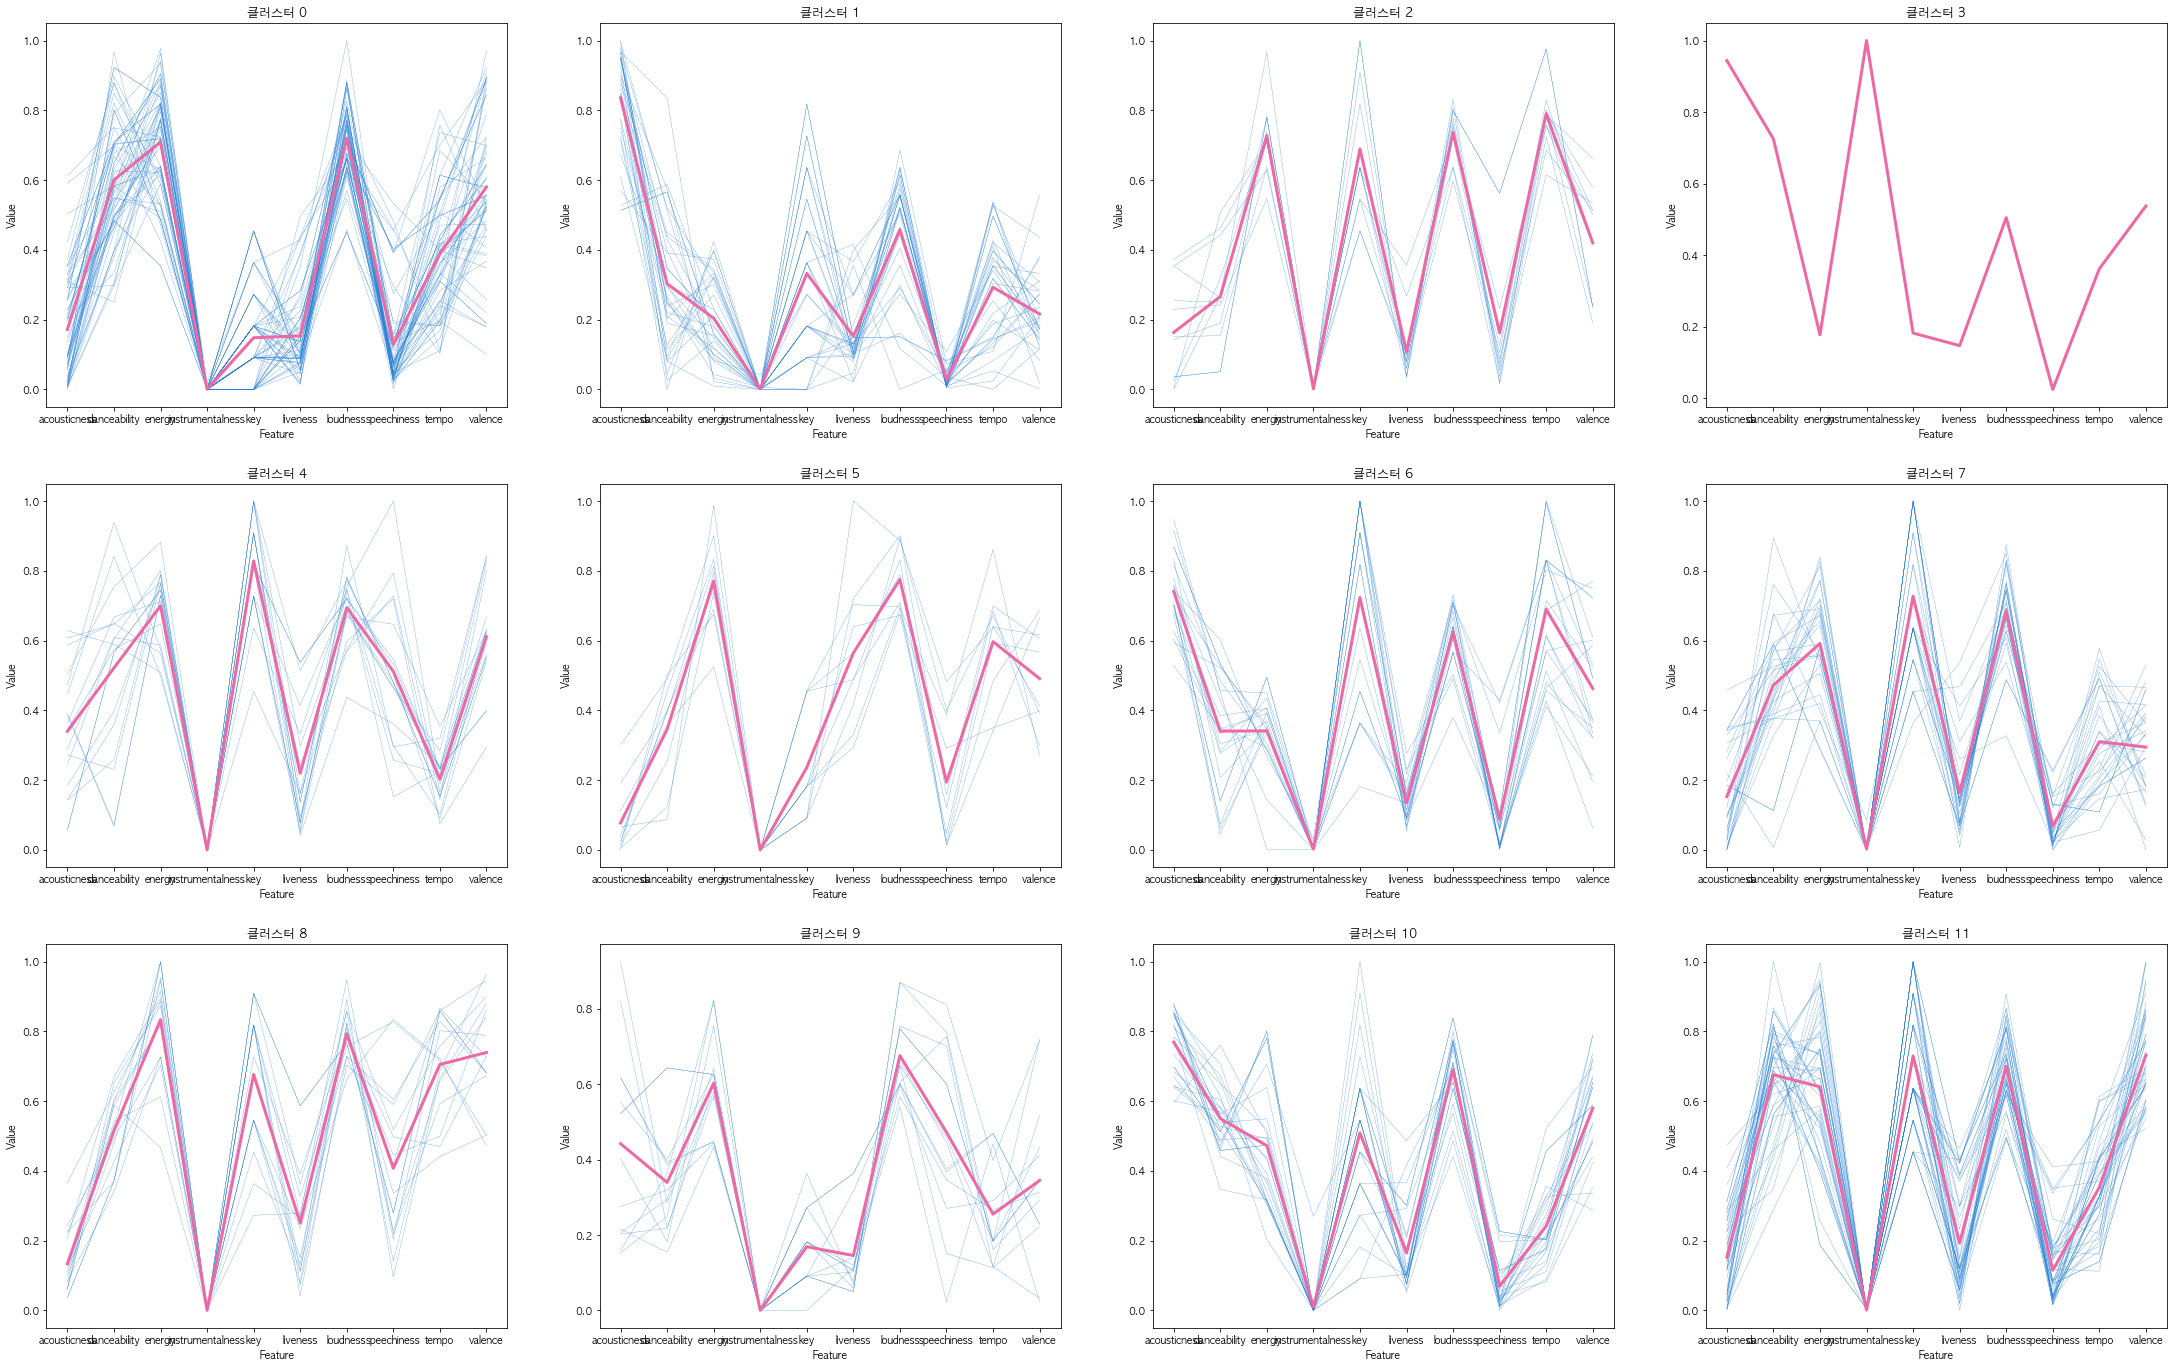

In [44]:
observer.run()
Demo2._clear()
observer.kmeans.draw_cluster()

## 3. SeedZone KMeans Sorting & Save

### 새로운 SeedZone 클러스터링 정보 <u>6295c3b167097b2e45b818b8</u>가 등록 되었습니다.

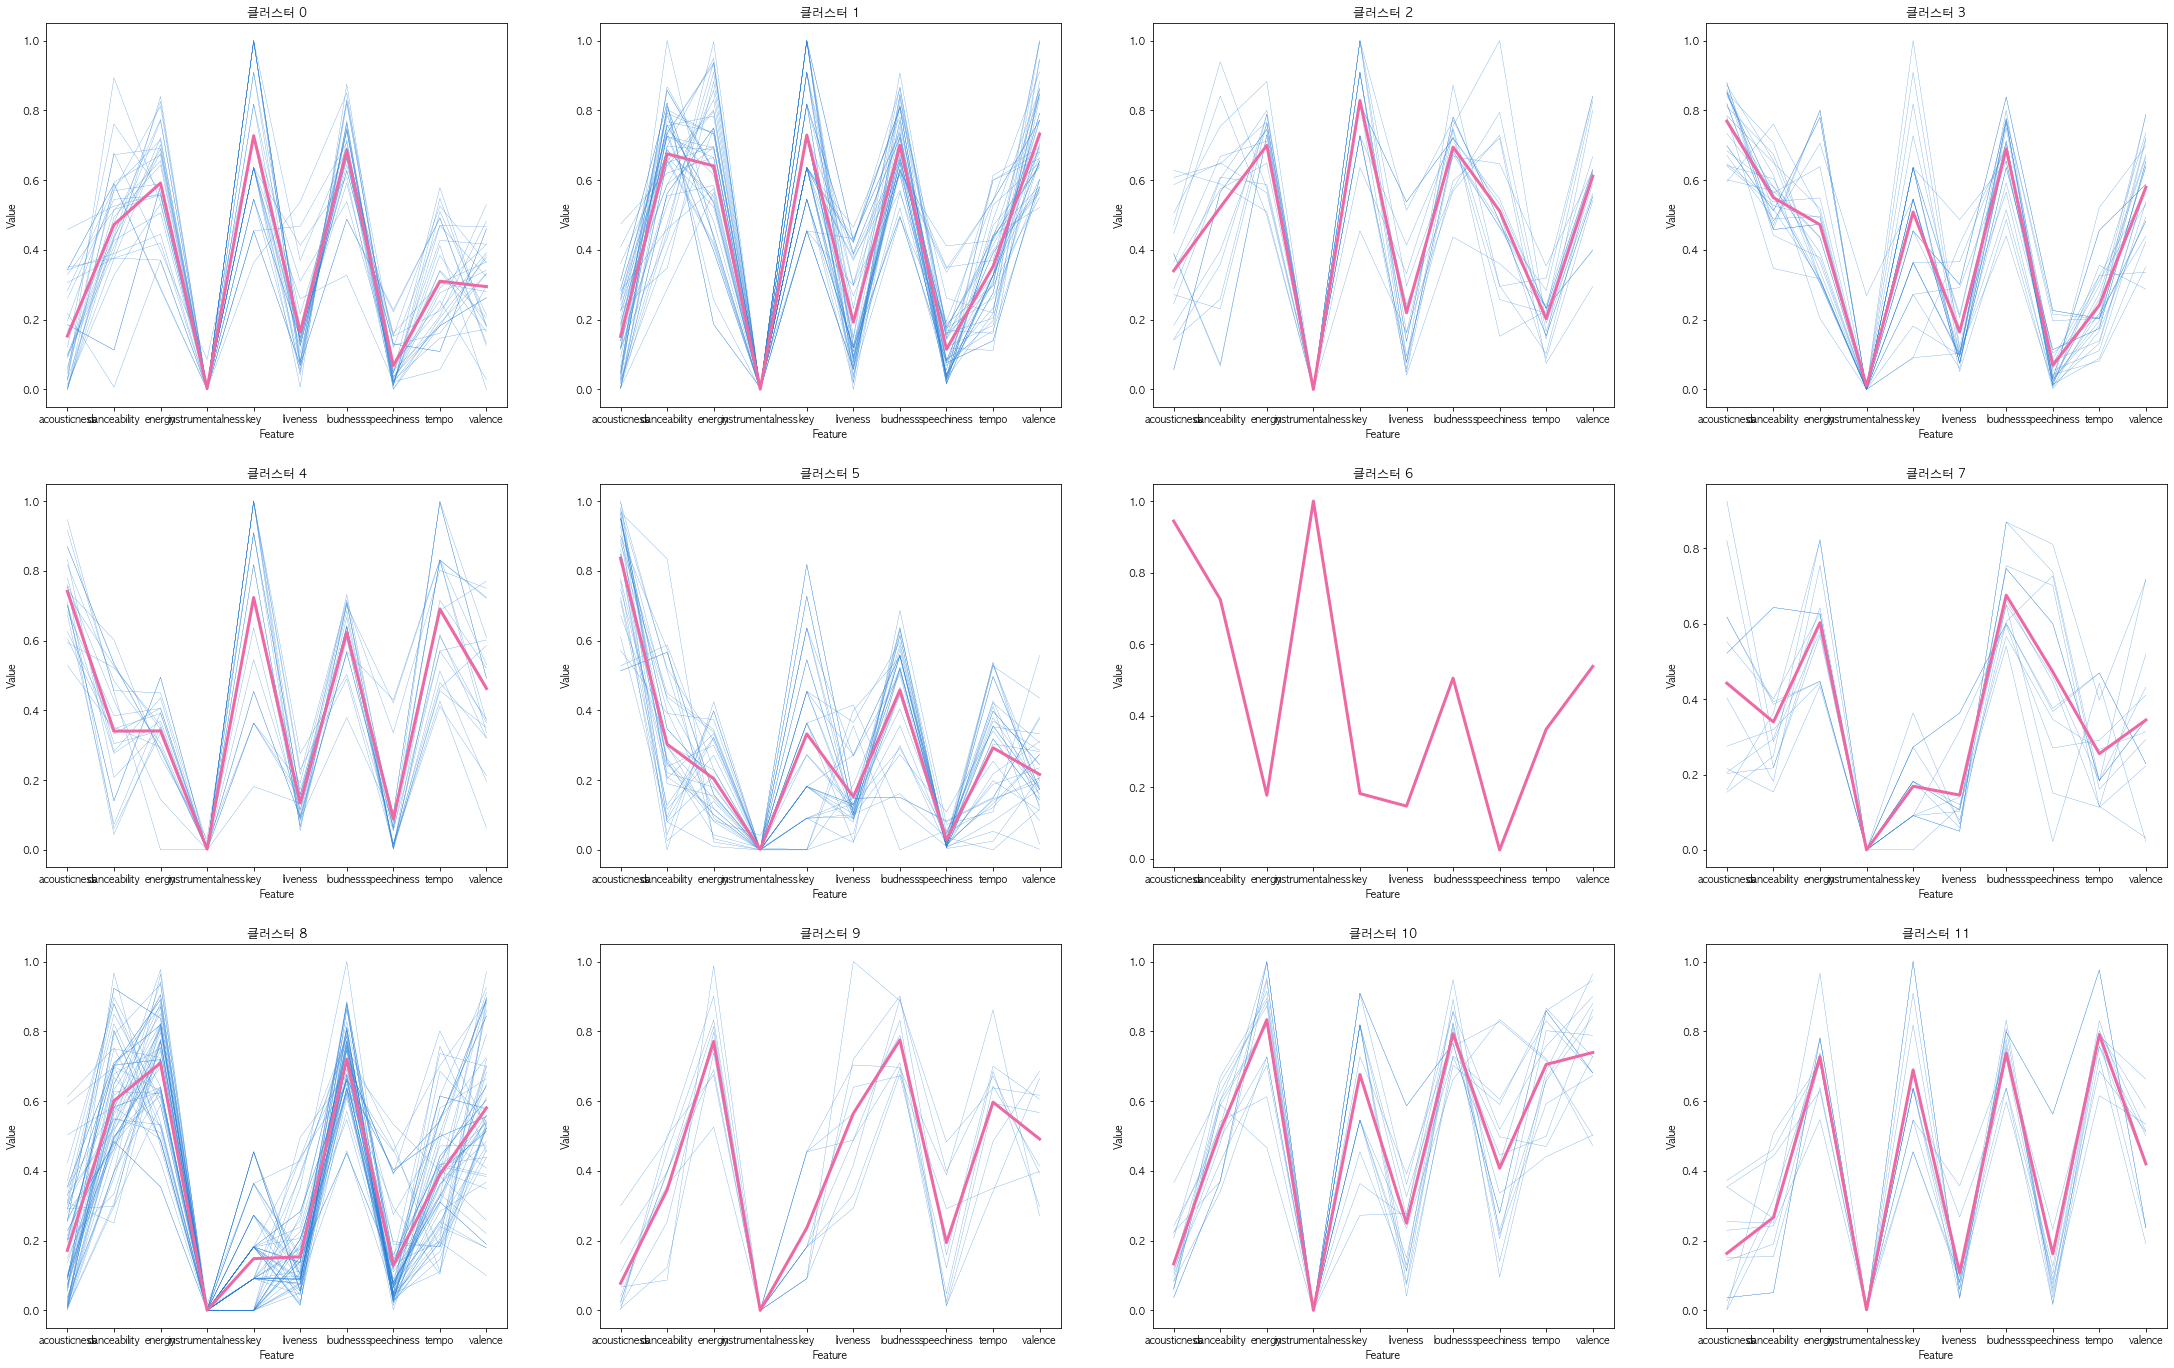

In [45]:
observer.sorting()
Demo2._clear()

observer.save()

Demo2.so_pt3(observer)
observer.kmeans.draw_cluster()

# 2. CoordGenerator

### SeedZone Observer가 생성한 최신 정보의 클러스터링 결과를 토대로 우체통에 좌표 부여

## 1. 전체 우체통에 좌표부여

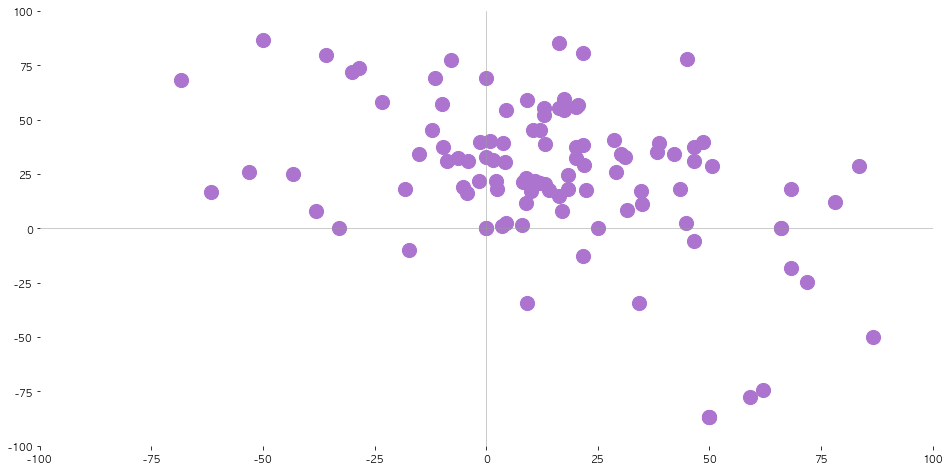

In [46]:
CoordGenerator.draw_map()

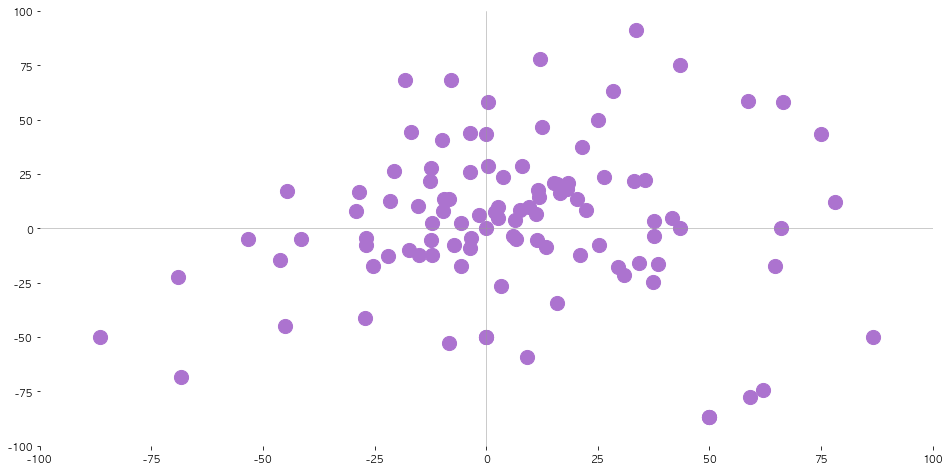

In [47]:
CoordGenerator.all_make_coords()
CoordGenerator.draw_map()

## 2. 각 우체통의 Seed 음악들의 클러스터 라벨 비율로 만들어지는 좌표

In [48]:
points, label_percentages = CoordGenerator.get_map_table()

label_percentages.head()

클러스터 번호,0,1,2,3,4,5,6,7,8,9,10,11
우체통 고유 ID,,,,,,,,,,,,
62908d62c1caa51c93e508c4,0,18,0,27,9,18,0,0,27,0,0,0
62908d64c1caa51c93e508c9,11,11,6,6,17,17,0,0,22,0,11,0
62908d67c1caa51c93e508cb,0,21,7,21,0,14,0,0,36,0,0,0
62908d6cc1caa51c93e508cd,12,24,0,0,6,12,0,0,35,0,6,6
62908d6ec1caa51c93e508ce,7,36,7,0,0,0,0,0,21,7,14,7


In [49]:
points.head()

,x,y
우체통 고유 ID,,
62908d62c1caa51c93e508c4,29.411543,-18.000000
62908d64c1caa51c93e508c9,11.339746,-5.196152
62908d67c1caa51c93e508cb,13.385263,-8.437822
62908d6cc1caa51c93e508cd,-15.310889,10.088457
62908d6ec1caa51c93e508ce,-16.748711,44.239092


### Visualization

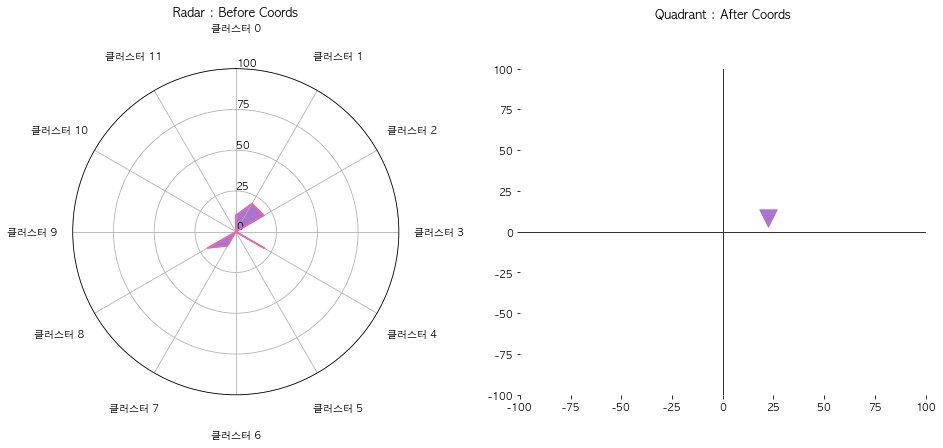

In [50]:
ran_mailbox = DB().random_mailbox()
gen = CoordGenerator(str(ran_mailbox['_id']))

gen.make_coords()
gen.draw_coord()

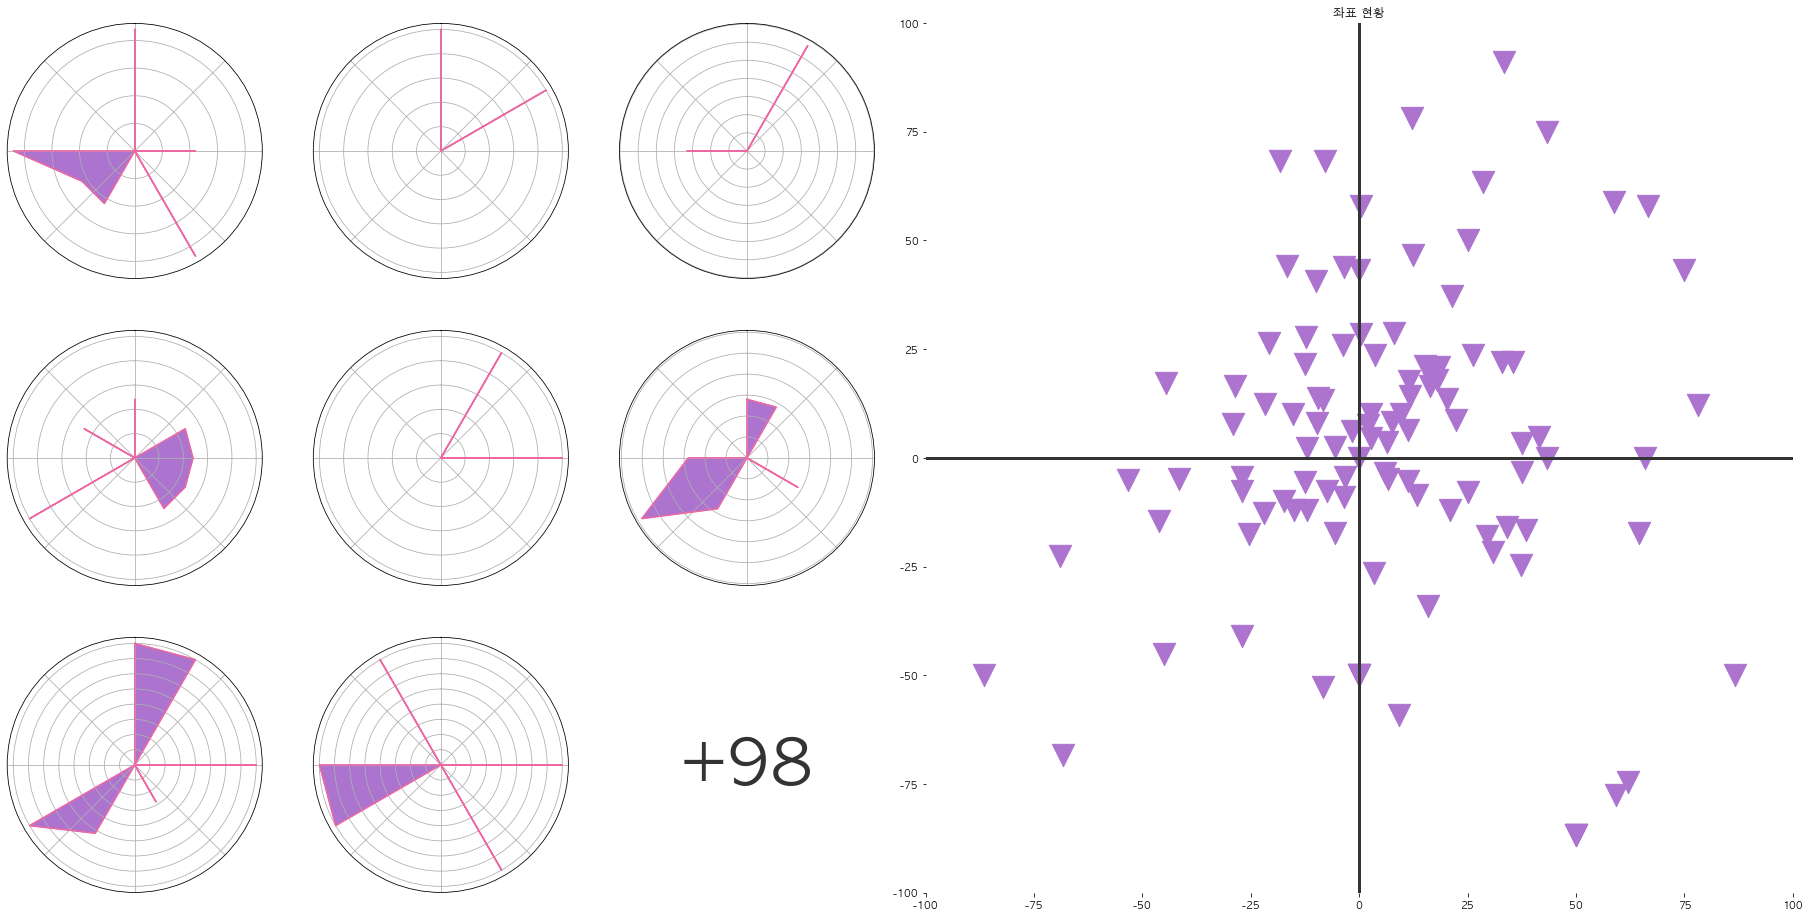

In [51]:
CoordGenerator.draw_radar_map()

## 3. 반경 내 외 테스트

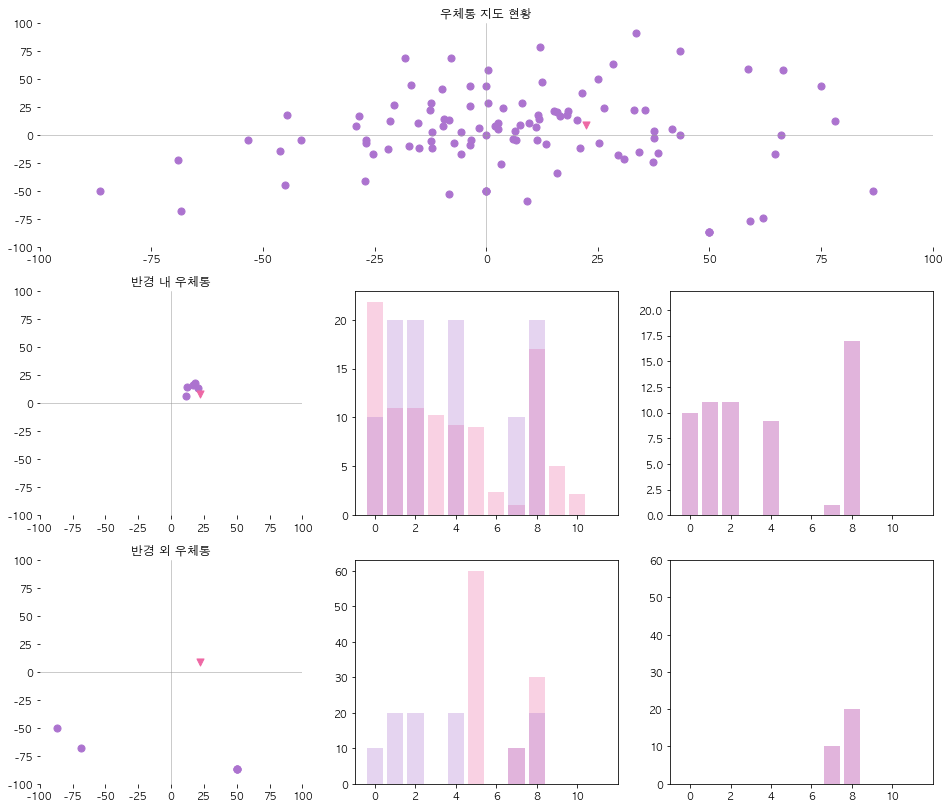

In [52]:
gen.radar_test()